Contour Properties
===
Here we will learn to extract some frequently used properties of objects like Solidity, Equivalent Diameter, Mask image, Mean Intensity etc. More features can be found at [Matlab regionprops documentation](http://www.mathworks.in/help/images/ref/regionprops.html).

*(NB : Centroid, Area, Perimeter etc also belong to this category, but we have seen it in last chapter)*

1. Aspect Ratio
---
It is the ratio of width to height of bounding rect of the object.

$Aspect \; Ratio = \frac{Width}{Height}$


Populating the interactive namespace from numpy and matplotlib
Aspect: 0.9724137931034482


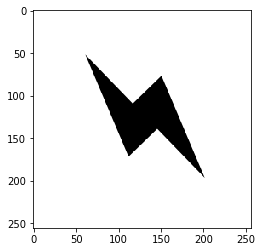

In [1]:
%pylab inline
import cv2
import numpy as np

img = cv2.imread('images/lightning.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
imgout, contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]

imshow(img)

x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
print ("Aspect: "+str(aspect_ratio))

2. Extent
---
Extent is the ratio of contour area to bounding rectangle area.

$Extent = \frac{Object \; Area}{Bounding \; Rectangle \; Area}$

In [2]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print ("Extent: "+str(extent))

Extent: 0.2888481291269259


3. Solidity
---
Solidity is the ratio of contour area to its convex hull area.

$Solidity = \frac{Contour \; Area}{Convex \; Hull \; Area}$

In [3]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print ("Solidity: "+str(solidity))

Solidity: 0.6107347846320906


4. Equivalent Diameter
---
Equivalent Diameter is the diameter of the circle whose area is same as the contour area.

$Equivalent \; Diameter = \sqrt{\frac{4 \times Contour \; Area}{\pi}}$

In [4]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print ("Equivalent Diameter " +str(equi_diameter))

Equivalent Diameter 86.7128371778568


5. Orientation
---
Orientation is the angle at which object is directed. Following method also gives the Major Axis and Minor Axis lengths.


In [5]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
print ("Angle: " +str(angle))

Angle: 155.85482788085938


6. Mask and Pixel Points
---
In some cases, we may need all the points which comprises that object. It can be done as follows:

In [6]:
mask = np.zeros(imgray.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
print (pixelpoints)
#pixelpoints = cv2.findNonZero(mask)

[[ 52  62]
 [ 53  61]
 [ 53  62]
 ...
 [195 200]
 [195 201]
 [196 200]]


Here, two methods, one using Numpy functions, next one using OpenCV function (last commented line) are given to do the same. Results are also same, but with a slight difference. Numpy gives coordinates in `(row, column)` format, while OpenCV gives coordinates in `(x,y)` format. So basically the answers will be interchanged. Note that, `row = x` and `column = y`.

7. Maximum Value, Minimum Value and their locations
---
We can find these parameters using a mask image.

In [7]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask)
print(min_val,max_val,min_loc,max_loc)

0.0 255.0 (63, 55) (63, 53)


8. Mean Color or Mean Intensity
---
Here, we can find the average color of an object. Or it can be average intensity of the object in grayscale mode. We again use the same mask to do it.

In [8]:
mean_val = cv2.mean(img,mask = mask)
print ("Mean Val: "+str(mean_val))

Mean Val: (17.406474820143885, 17.406474820143885, 17.406474820143885, 0.0)


In [9]:
print (cnt[0])

[[61 53]]


In [10]:
cnt[:,:,]

array([[[ 61,  53]],

       [[ 62,  52]],

       [[ 65,  55]],

       [[ 65,  56]],

       [[ 96,  87]],

       [[ 96,  88]],

       [[116, 108]],

       [[118, 108]],

       [[148,  78]],

       [[149,  78]],

       [[150,  77]],

       [[152,  79]],

       [[152,  80]],

       [[153,  81]],

       [[153,  82]],

       [[154,  83]],

       [[154,  85]],

       [[155,  86]],

       [[155,  87]],

       [[156,  88]],

       [[156,  89]],

       [[157,  90]],

       [[157,  92]],

       [[158,  93]],

       [[158,  94]],

       [[159,  95]],

       [[159,  97]],

       [[160,  98]],

       [[160,  99]],

       [[161, 100]],

       [[161, 101]],

       [[162, 102]],

       [[162, 104]],

       [[163, 105]],

       [[163, 106]],

       [[164, 107]],

       [[164, 108]],

       [[165, 109]],

       [[165, 111]],

       [[166, 112]],

       [[166, 113]],

       [[167, 114]],

       [[167, 115]],

       [[168, 116]],

       [[168, 118]],

       [[1

9. Extreme Points
---
Extreme Points means topmost, bottommost, rightmost and leftmost points of the object.


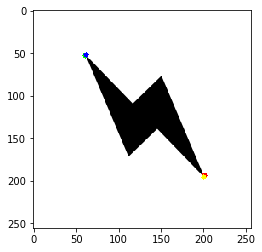

In [11]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

extreme = img.copy();
cv2.circle(extreme,leftmost,3,(0,255,0),-1)
cv2.circle(extreme,rightmost,3,(255,0,0),-1)
cv2.circle(extreme,topmost,3,(0,0,255),-1)
cv2.circle(extreme,bottommost,3,(255,255,0),-1)
imshow(extreme)